In [2]:
from scipy import sparse
import sklearn
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold, cross_validate,cross_val_predict,cross_val_score
from sklearn.datasets import load_breast_cancer
import sklearn.neighbors
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

/Users/AndrewCheng/Machine_Learning/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/Users/AndrewCheng/Machine_Learning/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [4]:
df_unscaled = pd.read_csv('/Users/AndrewCheng/Documents/School_Subjects/COMP551/Assignment1_Data/Adult_Unscaled.csv')
df_unscaled = df_unscaled.drop(columns=['fnlwgt', df_unscaled.columns[0]])
#df_unscaled.head()
adult_unscaled = df_unscaled.values
print(adult_unscaled)

[[   50    13     0 ...     0     0     0]
 [   38     9     0 ...     0     0     0]
 [   53     7     0 ...     0     0     0]
 ...
 [   22     9     0 ...     0     0     0]
 [   52     9 15024 ...     0     0     1]
 [   39    13  2174 ...     0     0     0]]


In [5]:

X = adult_unscaled[:,:-1]
y = adult_unscaled[:,-1]
print(X)

[[   50    13     0 ...     1     0     0]
 [   38     9     0 ...     1     0     0]
 [   53     7     0 ...     1     0     0]
 ...
 [   22     9     0 ...     1     0     0]
 [   52     9 15024 ...     1     0     0]
 [   39    13  2174 ...     1     0     0]]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
SG = SGDClassifier(loss = "log", penalty='none')
SG.fit(X_train,y_train)
SG.score(X_test,y_test)

0.7967113114971489

In [7]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
print(GNB.score(X_test, y_test))







0.8227025593422623


In [6]:
df_wgt= pd.read_csv('/Users/AndrewCheng/Documents/School_Subjects/COMP551/Assignment1_Data/fnlweight.csv')


In [7]:
fnl_wgt = df_wgt
sample_weights = np.array(fnl_wgt.iloc[:,0])
fnl_wgt = df_wgt.drop(columns=df_wgt.columns[0])




In [8]:
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y, sample_weights,random_state=42)
SG = SGDClassifier(loss = "log", penalty='none')
SG.fit(X_train,y_train)
SG.score(X_test,y_test)
SG.fit(X_train, y_train, sample_weight= w_train)
print(SG.score(X_test,y_test, w_test))

0.7983650915049127


In [9]:
np.random.seed(42)
scores = cross_val_score(SG, X, y)
print("Cross Validate Scores: {}".format(scores))

Cross Validate Scores: [0.78020885 0.79744737 0.79757958 0.80321618 0.80702918]


In [10]:
np.random.seed(42)
scores = cross_val_score(SG,X,y, fit_params={'sample_weight':sample_weights})

In [11]:
print(scores)
print(np.mean(scores))

[0.79081717 0.77589922 0.79675066 0.78000663 0.79757958]
0.7882106526394839


In [23]:
np.random.seed(42)
scores = cross_val_score(SG, X, y)
validate_scores = cross_validate(SG,X,y, return_train_score=True)
print("cross_val_score Scores: {}".format(scores))
print("cross_validate_score: {}".format(validate_scores))


cross_val_score Scores: [0.78020885 0.79744737 0.79757958 0.80321618 0.80702918]
cross_validate_score: {'fit_time': array([0.27388906, 0.31166196, 0.49612308, 0.25658011, 0.48456192]), 'score_time': array([0.00195599, 0.00191116, 0.00208497, 0.00216079, 0.00261497]), 'test_score': array([0.79363501, 0.79214321, 0.8002321 , 0.80056366, 0.80835544]), 'train_score': array([0.79302914, 0.80044759, 0.79954414, 0.79776212, 0.80049731])}


/Users/AndrewCheng/Machine_Learning/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/AndrewCheng/Machine_Learning/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/AndrewCheng/Machine_Learning/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/AndrewCheng/Machine_Learning/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_ite

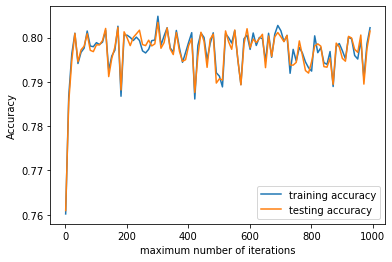

In [34]:
training_accuracy = []
testing_accuracy = []
np.random.seed(42)
max_iter = np.arange(1,1000, 10)

for i in max_iter:
    SG = SGDClassifier(loss = "log", penalty='none', max_iter= i)
    scores_dict = cross_validate(SG, X,y, return_train_score=True)
    train_score_mean = np.mean(scores_dict['train_score'])
    test_score_mean = np.mean(scores_dict['test_score'])
    training_accuracy.append(train_score_mean)
    testing_accuracy.append(test_score_mean)

plt.plot(max_iter, training_accuracy, label = 'training accuracy')
plt.plot(max_iter, testing_accuracy, label = 'testing accuracy')
plt.xlabel('maximum number of iterations')
plt.ylabel('Accuracy')
plt.legend()
    
    
plt.savefig('/Users/AndrewCheng/Documents/School_Subjects/COMP551/Assignment1_Data/accuracy', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)#%%



In [48]:
a1 = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
a2 = np.array([[4,5,6],[7,8,9],[1,1,1]])
a1_rows = a1.view([('', a1.dtype)] * a1.shape[1])
a2_rows = a2.view([('', a2.dtype)] * a2.shape[1])
z = np.setdiff1d(a1_rows, a2_rows).view(a1.dtype).reshape(-1, a1.shape[1])


In [50]:
z.shape

(2, 3)

In [51]:
X.shape

(30162, 84)

In [52]:
X

array([[   50,    13,     0, ...,     1,     0,     0],
       [   38,     9,     0, ...,     1,     0,     0],
       [   53,     7,     0, ...,     1,     0,     0],
       ...,
       [   22,     9,     0, ...,     1,     0,     0],
       [   52,     9, 15024, ...,     1,     0,     0],
       [   39,    13,  2174, ...,     1,     0,     0]])

In [54]:
X.dtype

dtype('int64')